## Data loading


In [10]:
import pandas as pd

try:
    df = pd.read_csv('train_schedule.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'train_schedule.csv' not found.")
    df = None

,SN,Train_No,Station_Code,1A,2A,3A,SL,Station_Name,Route_Number,Arrival_time,Departure_Time,Distance
0,1,107,SWV,100,100,100,100,SAWANTWADI R,1,00:00:00,10:25:00,0
1,2,107,THVM,260,228,196,164,THIVIM,1,11:06:00,11:08:00,32
2,3,107,KRMI,345,296,247,198,KARMALI,1,11:28:00,11:30:00,49
3,4,107,MAO,490,412,334,256,MADGOAN JN.,1,12:10:00,00:00:00,78
4,1,108,MAO,100,100,100,100,MADGOAN JN.,1,00:00:00,20:30:00,0


(186074, 12)


## Data exploration



In [11]:
# Examine data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)

# Number of unique values
print(df.nunique())

# Descriptive statistics for numerical features
print(df.describe())

# Analyze categorical features (example: Station_Name)
print(df['Station_Name'].value_counts())
print(df['Station_Code'].value_counts())

SN                 int64
Train_No           int64
Station_Code      object
1A                 int64
2A                 int64
3A                 int64
SL                 int64
Station_Name      object
Route_Number       int64
Arrival_time      object
Departure_Time    object
Distance           int64
dtype: object
SN                0
Train_No          0
Station_Code      0
1A                0
2A                0
3A                0
SL                0
Station_Name      0
Route_Number      0
Arrival_time      0
Departure_Time    0
Distance          0
dtype: int64
SN                0.0
Train_No          0.0
Station_Code      0.0
1A                0.0
2A                0.0
3A                0.0
SL                0.0
Station_Name      0.0
Route_Number      0.0
Arrival_time      0.0
Departure_Time    0.0
Distance          0.0
dtype: float64
SN                  118
Train_No          11113
Station_Code       8147
1A                 3097
2A                 3097
3A                 3097
SL        

## Data cleaning


In [12]:
import pandas as pd

# Convert time columns to datetime objects
try:
    df['Arrival_time'] = pd.to_datetime(df['Arrival_time'], format='%H:%M:%S', errors='raise')
    df['Departure_Time'] = pd.to_datetime(df['Departure_Time'], format='%H:%M:%S', errors='raise')
except ValueError as e:
    print(f"Error converting time columns to datetime: {e}")
    # Handle the error, e.g., by inspecting the problematic rows and deciding on a strategy

# Outlier detection and treatment using IQR for numerical columns
numerical_cols = ['1A', '2A', '3A', 'SL', 'Distance']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Standardize categorical columns
df['Station_Name'] = df['Station_Name'].str.lower()
df['Station_Code'] = df['Station_Code'].str.lower()

# Remove the constant 'Route_Number' column
if df['Route_Number'].nunique() == 1:
    df = df.drop('Route_Number', axis=1)

display(df.head())

,SN,Train_No,Station_Code,1A,2A,3A,SL,Station_Name,Arrival_time,Departure_Time,Distance
0,1,107,swv,100,100,100,100,sawantwadi r,1900-01-01 00:00:00,1900-01-01 10:25:00,0
1,2,107,thvm,260,228,196,164,thivim,1900-01-01 11:06:00,1900-01-01 11:08:00,32
2,3,107,krmi,345,296,247,198,karmali,1900-01-01 11:28:00,1900-01-01 11:30:00,49
3,4,107,mao,490,412,334,256,madgoan jn.,1900-01-01 12:10:00,1900-01-01 00:00:00,78
4,1,108,mao,100,100,100,100,madgoan jn.,1900-01-01 00:00:00,1900-01-01 20:30:00,0


In [13]:
import pandas as pd

# Convert time columns to datetime objects
try:
    df['Arrival_time'] = pd.to_datetime(df['Arrival_time'], format='%H:%M:%S', errors='raise')
    df['Departure_Time'] = pd.to_datetime(df['Departure_Time'], format='%H:%M:%S', errors='raise')
except ValueError as e:
    print(f"Error converting time columns to datetime: {e}")
    # Handle the error, e.g., by inspecting the problematic rows and deciding on a strategy

# Outlier detection and treatment using IQR for numerical columns
numerical_cols = ['1A', '2A', '3A', 'SL', 'Distance']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Standardize categorical columns
df.loc[:, 'Station_Name'] = df['Station_Name'].str.lower()
df.loc[:, 'Station_Code'] = df['Station_Code'].str.lower()


display(df.head())

,SN,Train_No,Station_Code,1A,2A,3A,SL,Station_Name,Arrival_time,Departure_Time,Distance
0,1,107,swv,100,100,100,100,sawantwadi r,1900-01-01 00:00:00,1900-01-01 10:25:00,0
1,2,107,thvm,260,228,196,164,thivim,1900-01-01 11:06:00,1900-01-01 11:08:00,32
2,3,107,krmi,345,296,247,198,karmali,1900-01-01 11:28:00,1900-01-01 11:30:00,49
3,4,107,mao,490,412,334,256,madgoan jn.,1900-01-01 12:10:00,1900-01-01 00:00:00,78
4,1,108,mao,100,100,100,100,madgoan jn.,1900-01-01 00:00:00,1900-01-01 20:30:00,0


## Data wrangling


In [14]:
import pandas as pd

# Convert 'Arrival_time' and 'Departure_Time' to datetime objects
try:
    df['Arrival_time'] = pd.to_datetime(df['Arrival_time'])
    df['Departure_Time'] = pd.to_datetime(df['Departure_Time'])
except Exception as e:
    print(f"Error converting time columns: {e}")
    # Handle the error appropriately, e.g., by removing problematic rows or replacing invalid values

# Calculate 'Travel_Time' in minutes
df['Travel_Time'] = (df['Departure_Time'] - df['Arrival_time']).dt.total_seconds() / 60

# Handle negative travel times (if any)
df['Travel_Time'] = df['Travel_Time'].apply(lambda x: 0 if x < 0 else x)

# Create 'Day_of_Week' (dummy column since there's no date information)
df['Day_of_Week'] = 'Unknown'
print("Created 'Day_of_Week' as a dummy column because no date information is available in the provided data.")


display(df.head())

Created 'Day_of_Week' as a dummy column because no date information is available in the provided data.


,SN,Train_No,Station_Code,1A,2A,3A,SL,Station_Name,Arrival_time,Departure_Time,Distance,Travel_Time,Day_of_Week
0,1,107,swv,100,100,100,100,sawantwadi r,1900-01-01 00:00:00,1900-01-01 10:25:00,0,625.0,Unknown
1,2,107,thvm,260,228,196,164,thivim,1900-01-01 11:06:00,1900-01-01 11:08:00,32,2.0,Unknown
2,3,107,krmi,345,296,247,198,karmali,1900-01-01 11:28:00,1900-01-01 11:30:00,49,2.0,Unknown
3,4,107,mao,490,412,334,256,madgoan jn.,1900-01-01 12:10:00,1900-01-01 00:00:00,78,0.0,Unknown
4,1,108,mao,100,100,100,100,madgoan jn.,1900-01-01 00:00:00,1900-01-01 20:30:00,0,1230.0,Unknown


## Data analysis




Summary Statistics for Numerical Features:


,1A,2A,3A,SL,Distance,Travel_Time
count,120682.000000,120682.000000,120682.000000,120682.000000,120682.000000,120682.000000
mean,323.870088,279.096071,234.322053,189.548035,44.774018,14.664805
std,198.776245,159.020996,119.265747,79.510498,39.755249,112.394248
min,100.000000,100.000000,100.000000,100.000000,0.000000,0.000000
25%,165.000000,152.000000,139.000000,126.000000,13.000000,1.000000
50%,265.000000,232.000000,199.000000,166.000000,33.000000,1.000000
75%,445.000000,376.000000,307.000000,238.000000,69.000000,1.000000
max,865.000000,712.000000,559.000000,406.000000,153.000000,1439.000000


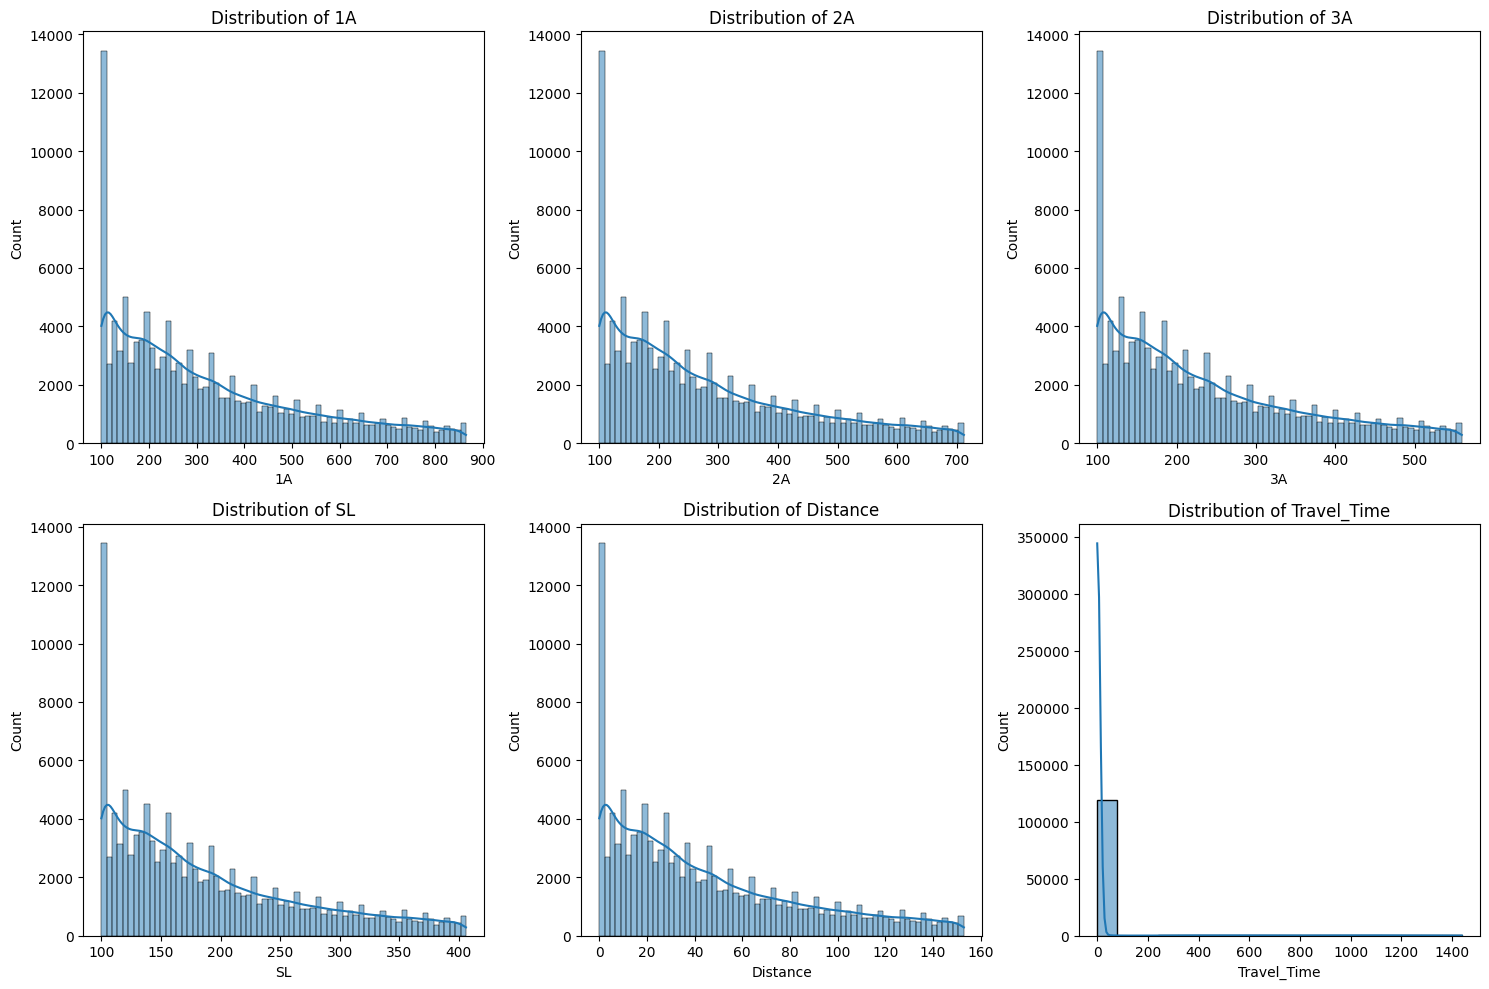

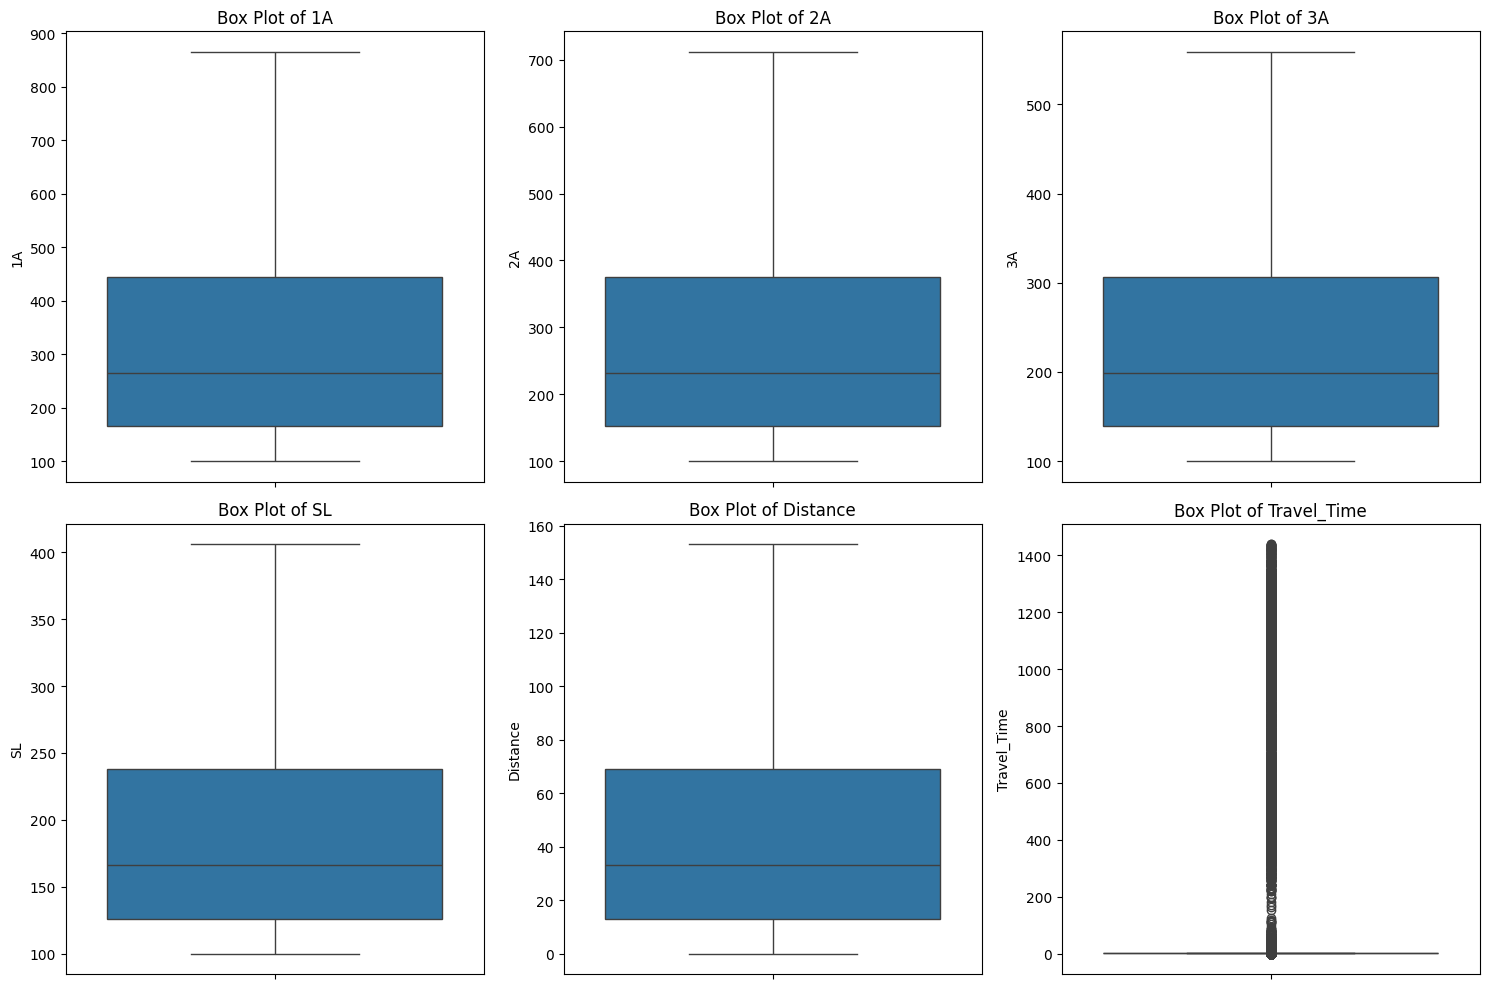


Frequency Distributions for Categorical Features:

Frequency Distribution of Station_Name:


Station_Name
cst-mumbai      973
chennai beac    738
thane           713
sealdah         711
kalyan jn       685
howrah jn.      563
dadar           527
kurla           462
dum dum jn.     455
ghat kopar      406
Name: count, dtype: int64


Frequency Distribution of Station_Code:


Station_Code
csmt    973
msb     738
tna     713
sdah    711
kyn     685
hwh     563
dr      509
cla     462
ddj     455
gc      406
Name: count, dtype: int64


Frequency Distribution of Day_of_Week:


Day_of_Week
Unknown    120682
Name: count, dtype: int64

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis: Summary Statistics
numerical_features = ['1A', '2A', '3A', 'SL', 'Distance', 'Travel_Time']
print("Summary Statistics for Numerical Features:")
display(df[numerical_features].describe())

# Histograms and Box Plots for Numerical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Frequency Distributions for Categorical Features
categorical_features = ['Station_Name', 'Station_Code', 'Day_of_Week']
print("\nFrequency Distributions for Categorical Features:")
for col in categorical_features:
    print(f"\nFrequency Distribution of {col}:")
    display(df[col].value_counts().head(10)) # Displaying top 10 for brevity


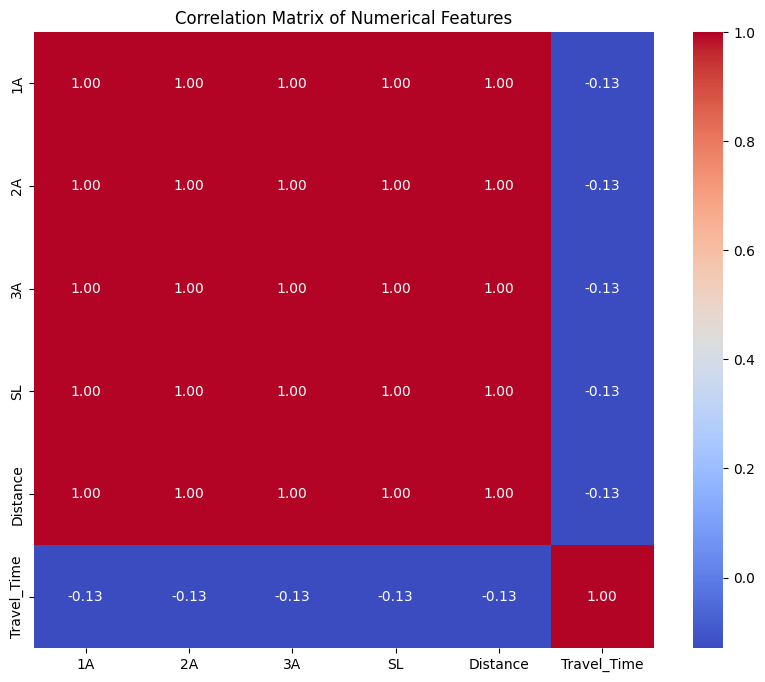

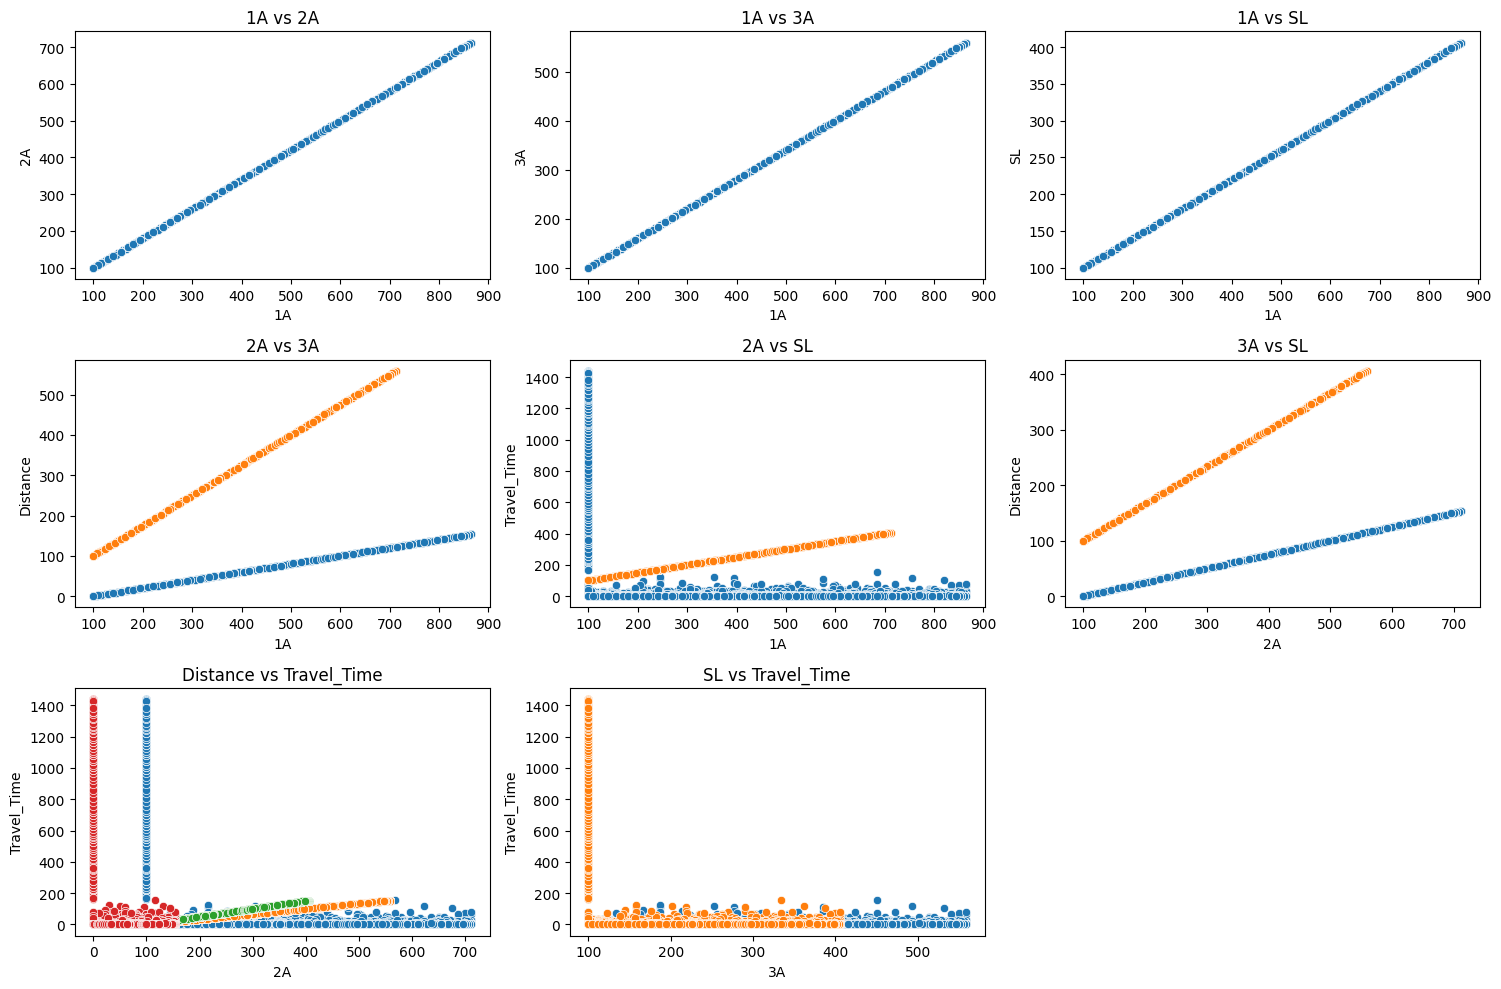

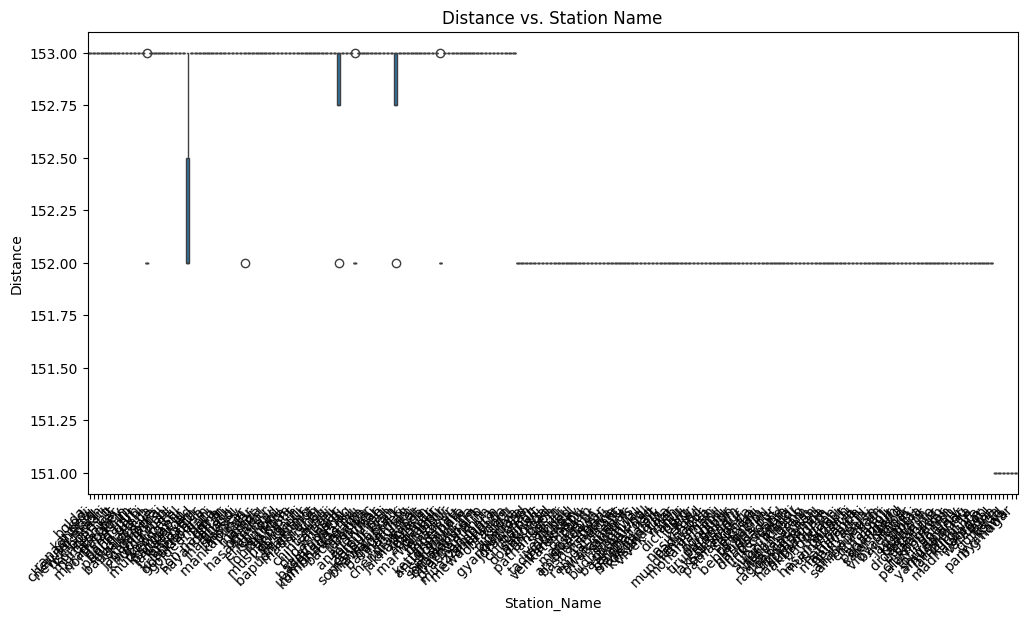

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate Analysis: Correlation Matrix and Heatmap
numerical_features = ['1A', '2A', '3A', 'SL', 'Distance', 'Travel_Time']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Scatter Plots for Pairs of Numerical Variables
plt.figure(figsize=(15, 10))
for i, col1 in enumerate(numerical_features):
    for j, col2 in enumerate(numerical_features):
        if i < j:  # Avoid redundant plots and diagonal
            plt.subplot(3, 3, i * 3 + j - i * (i + 1) // 2)
            sns.scatterplot(x=df[col1], y=df[col2])
            plt.title(f'{col1} vs {col2}')
plt.tight_layout()
plt.show()

# Relationship between categorical and numerical features (example: Distance vs Station_Name)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Station_Name', y='Distance', data=df.sort_values(by='Distance', ascending=False).head(500)) # Limit data for better visualization
plt.xticks(rotation=45, ha='right')
plt.title('Distance vs. Station Name')
plt.show()

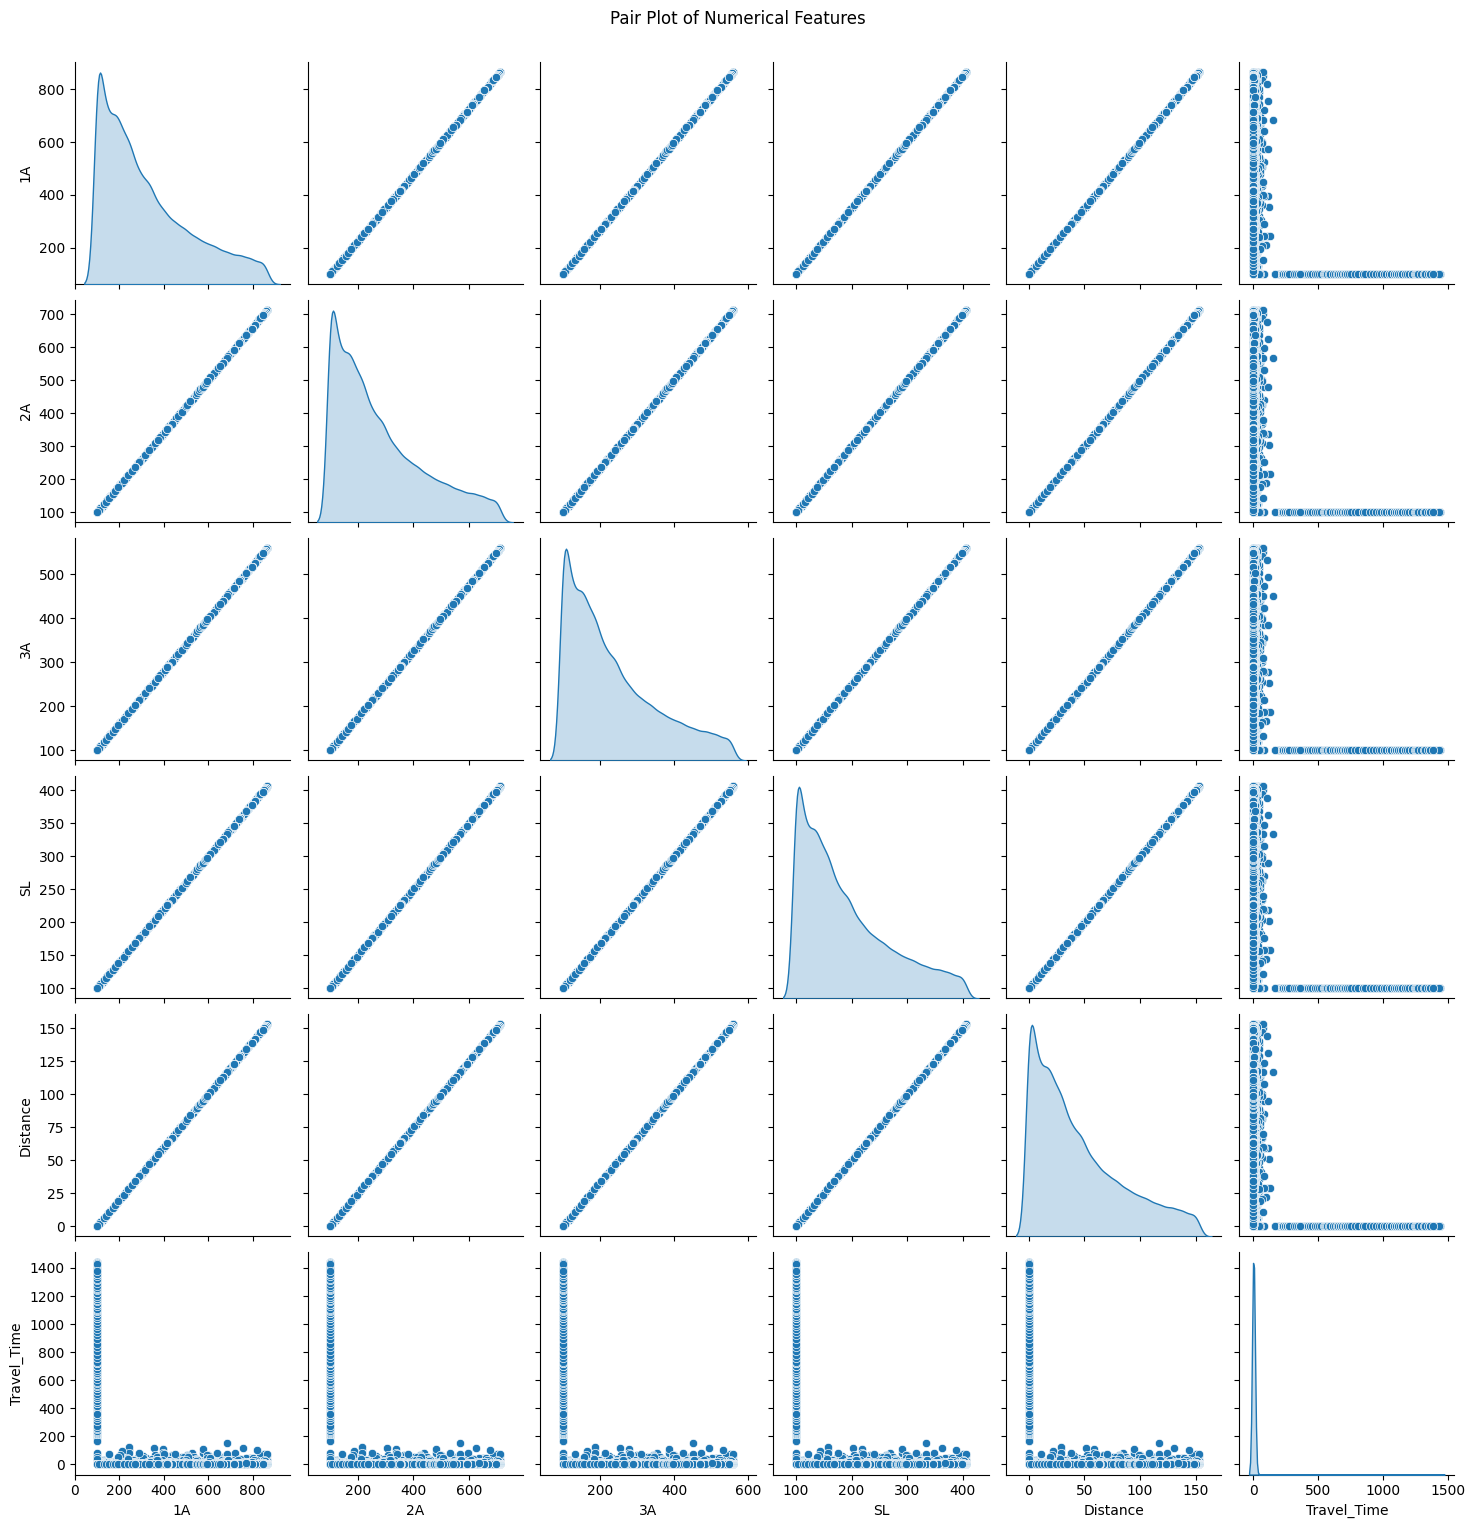

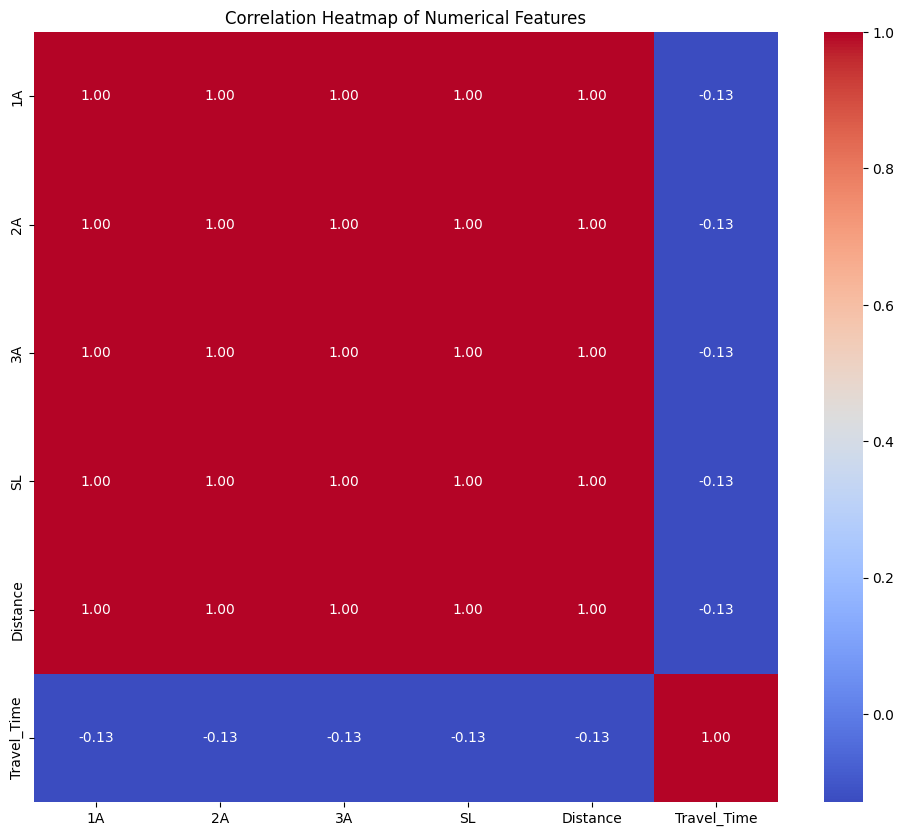

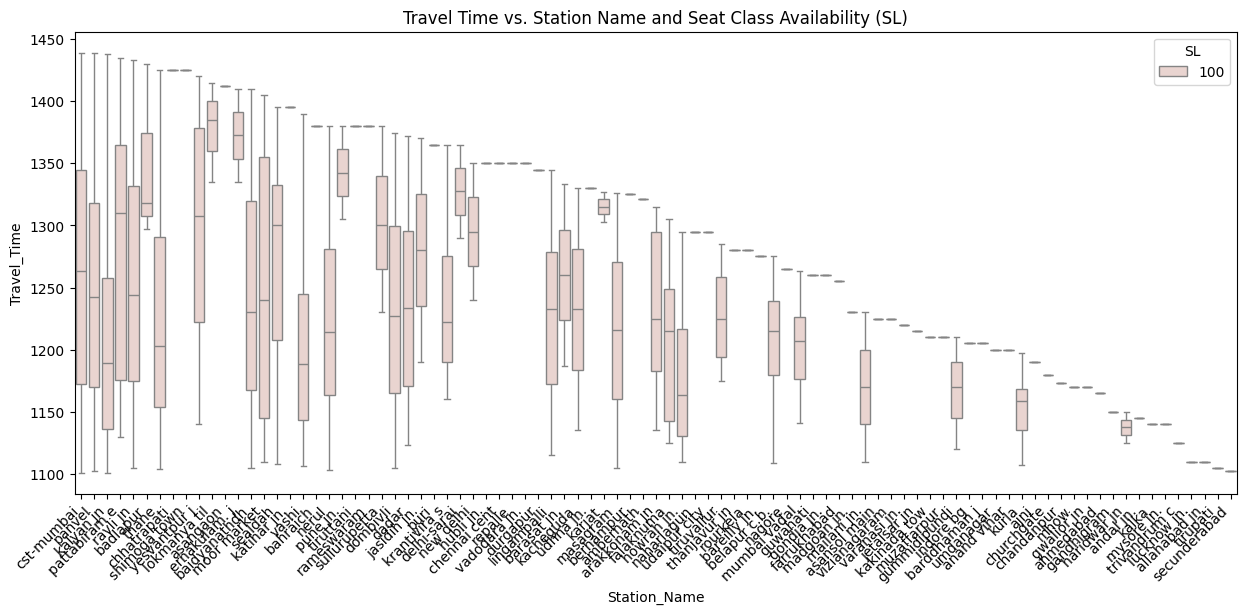

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Multivariate Analysis: Pair Plots
numerical_features = ['1A', '2A', '3A', 'SL', 'Distance', 'Travel_Time']
sns.pairplot(df[numerical_features], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Multivariate Analysis: Heatmap of correlations with a larger figure size
plt.figure(figsize=(12, 10))  # Increased figure size
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Grouped Comparisons: Travel Time vs. Station Name and Seat Class
# (Illustrative example - adapt based on actual data)
plt.figure(figsize=(15, 6))
sns.boxplot(x='Station_Name', y='Travel_Time', hue='SL', data=df.sort_values(by='Travel_Time', ascending=False).head(500))
plt.xticks(rotation=45, ha='right')
plt.title('Travel Time vs. Station Name and Seat Class Availability (SL)')
plt.show()

## Data visualization




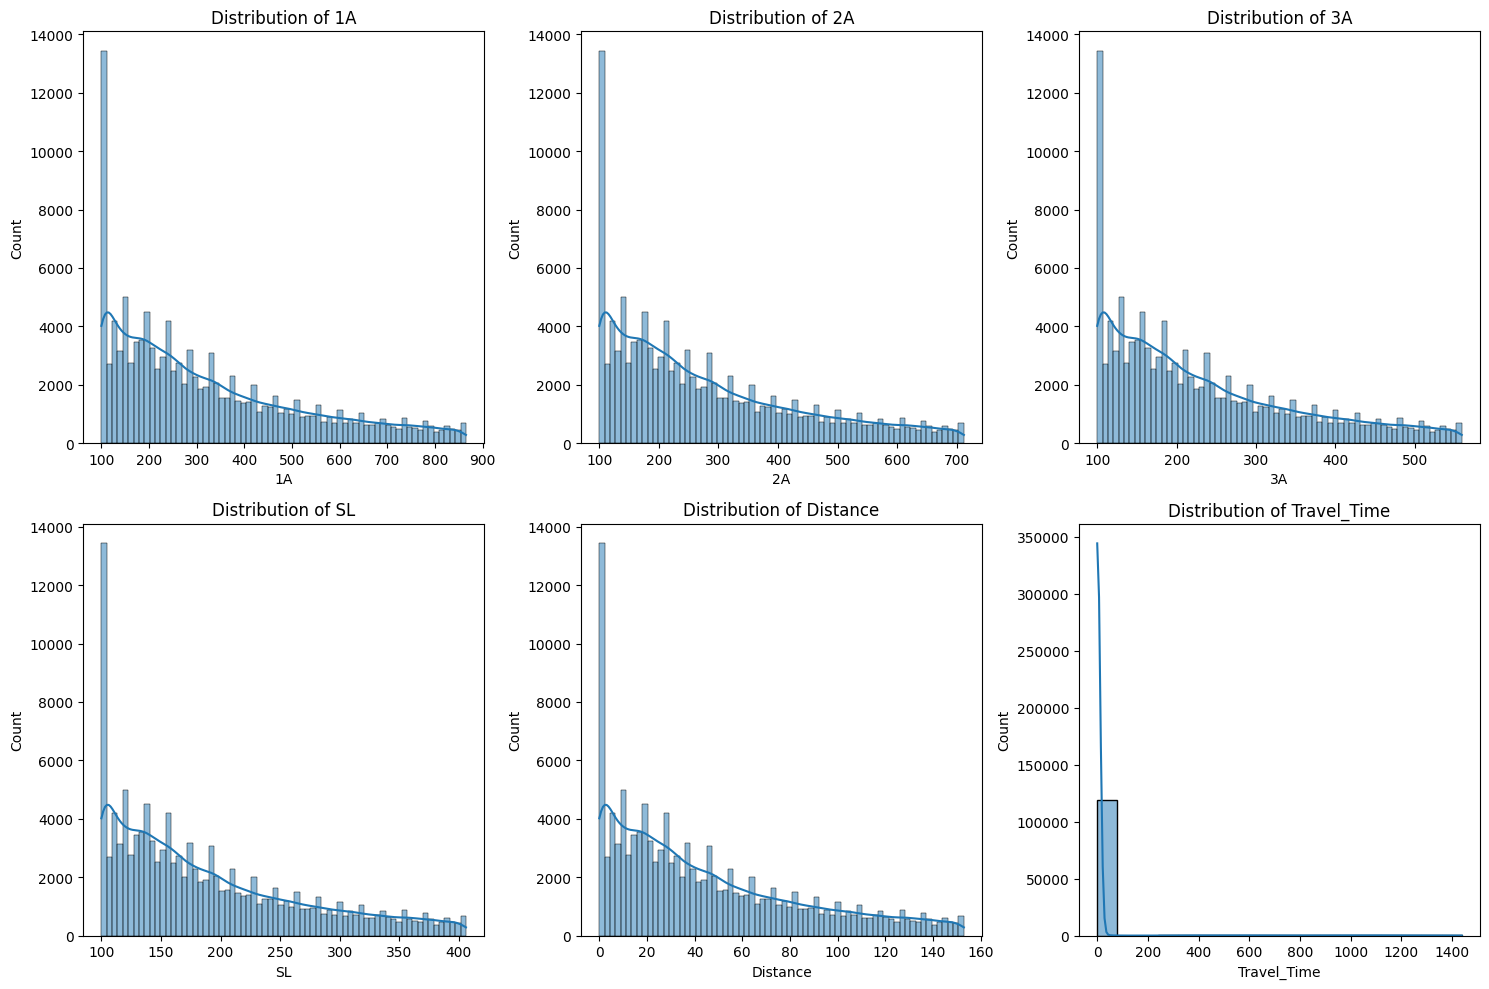

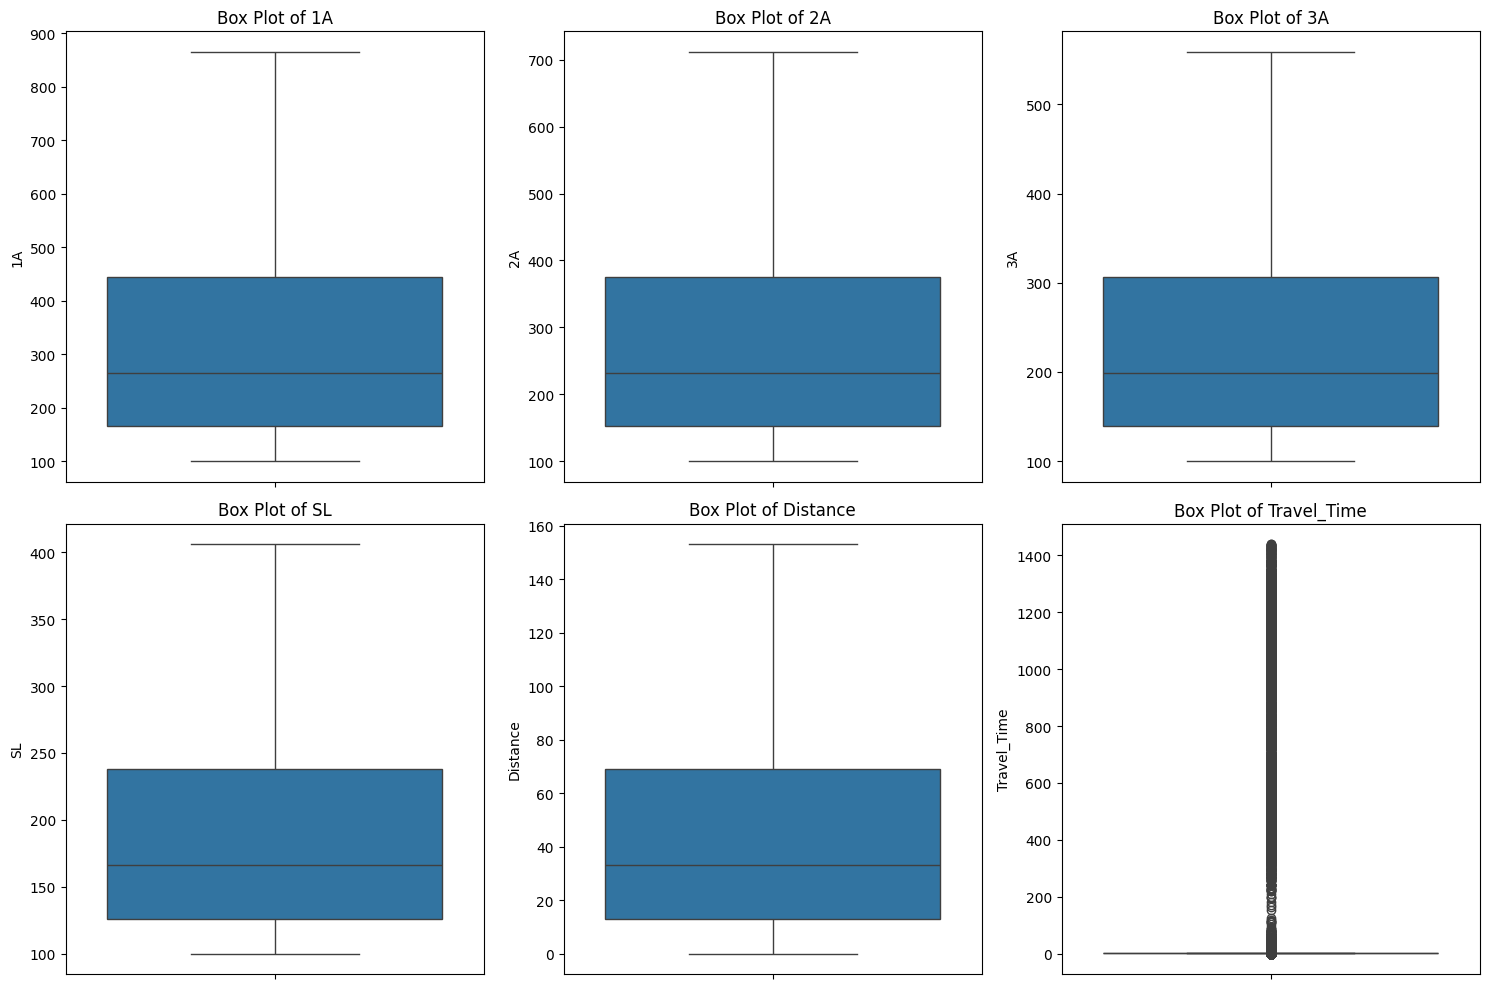

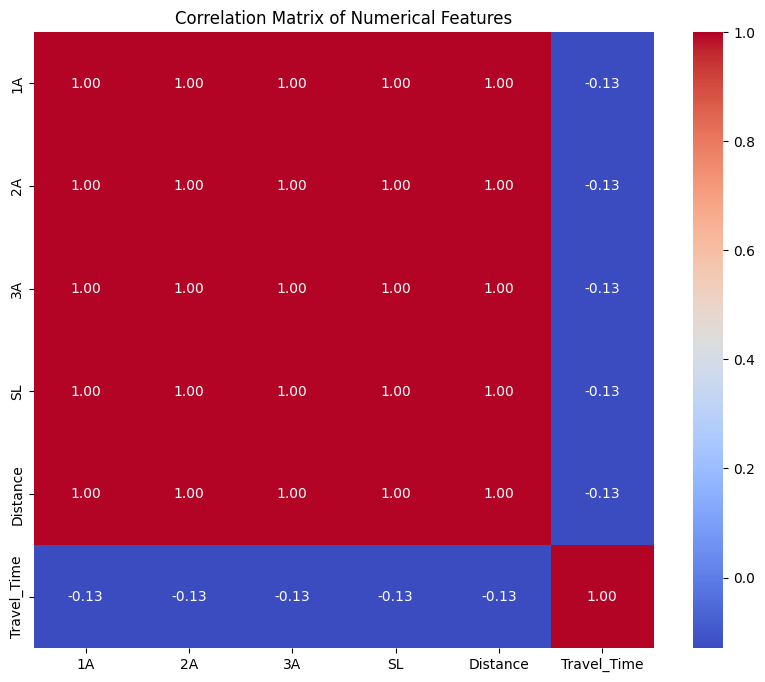

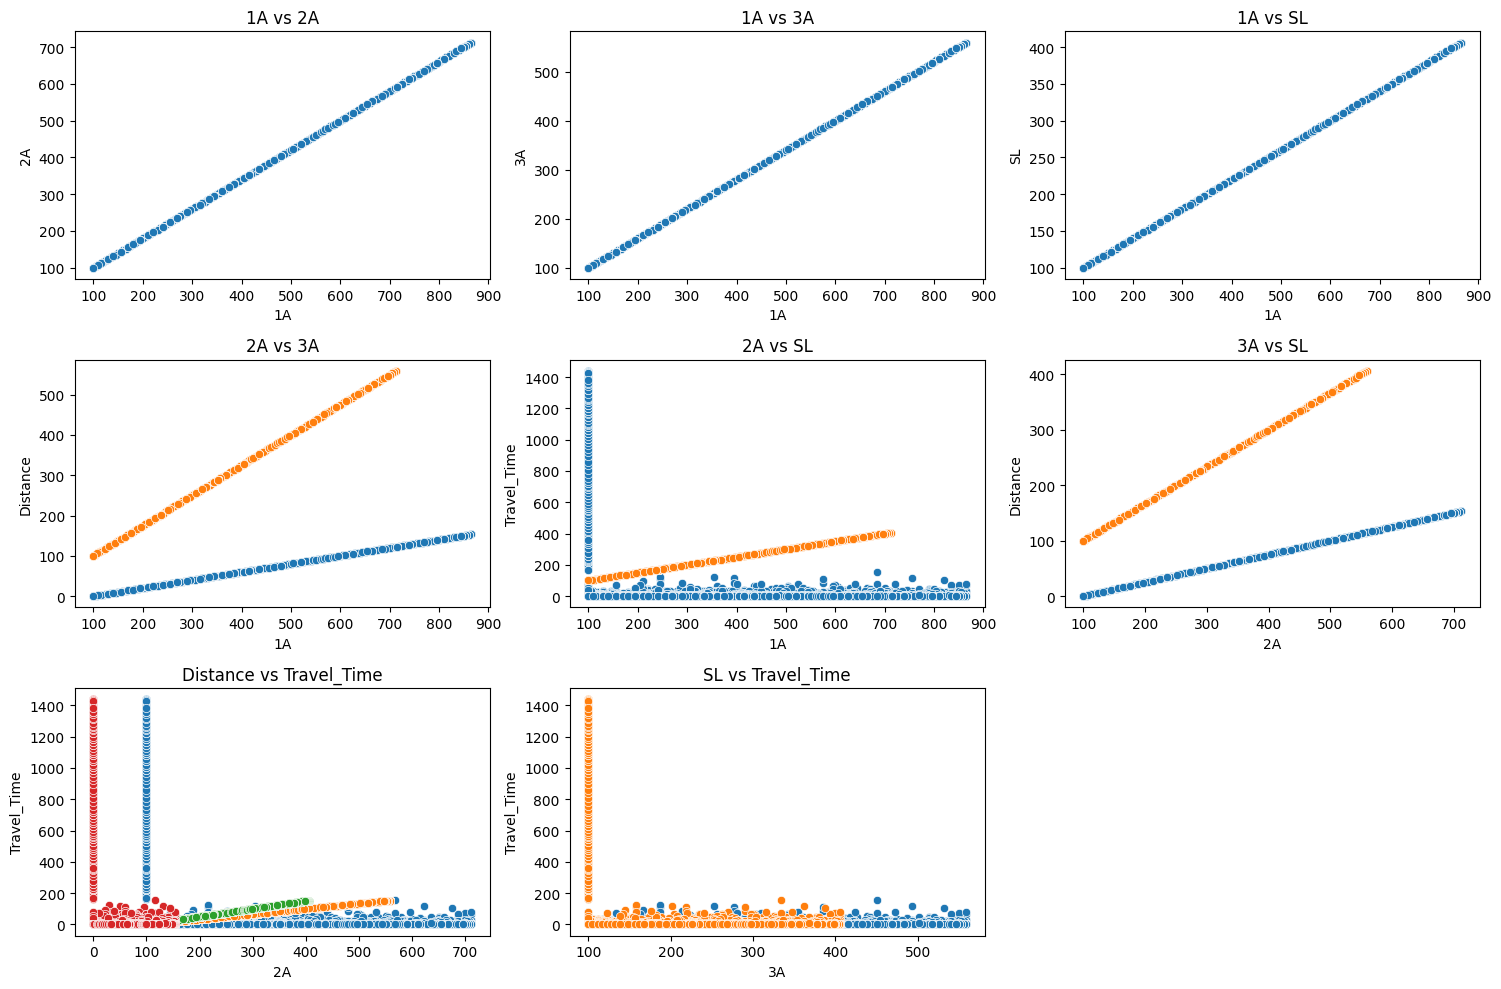

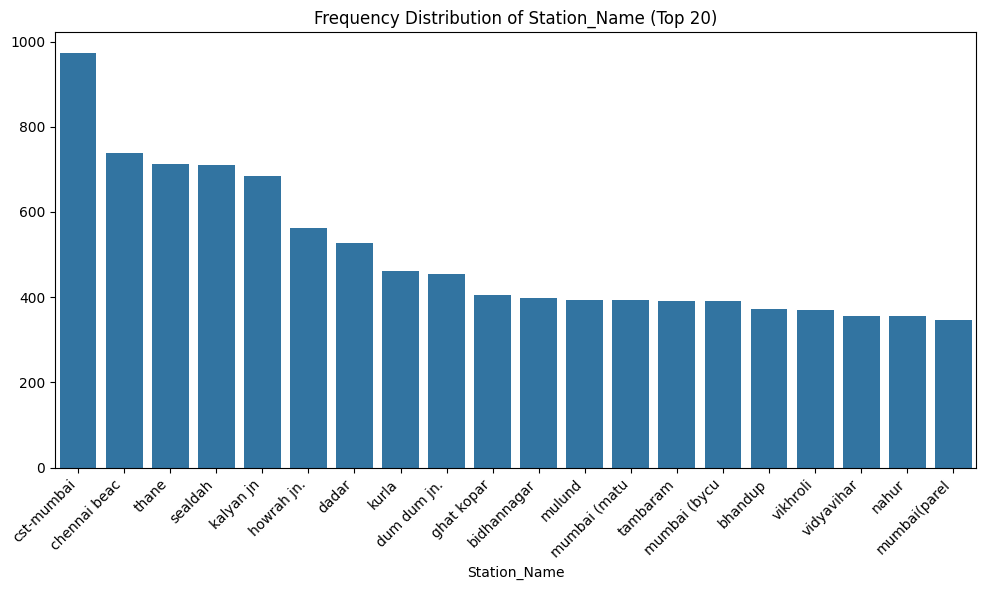

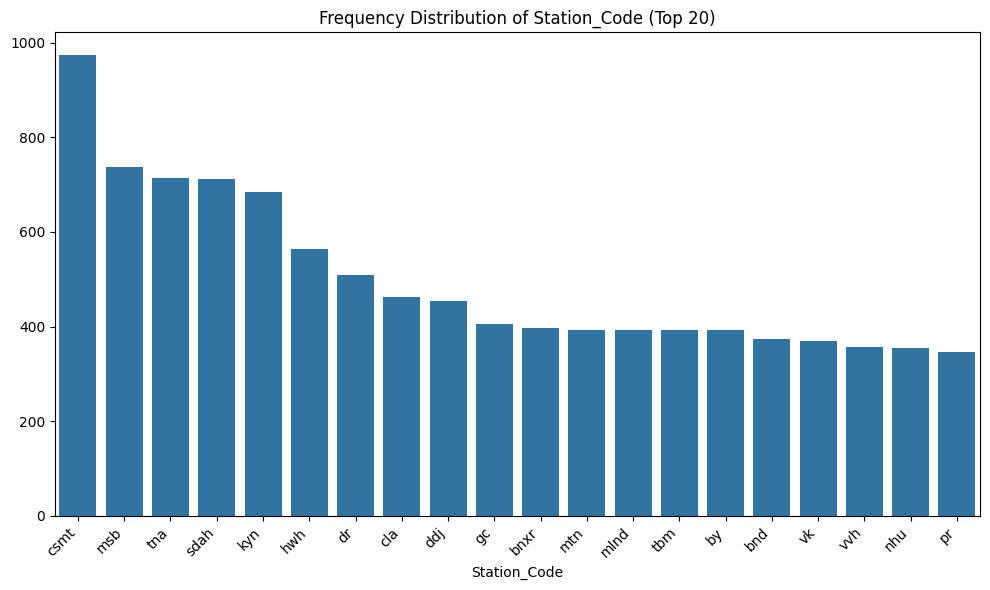

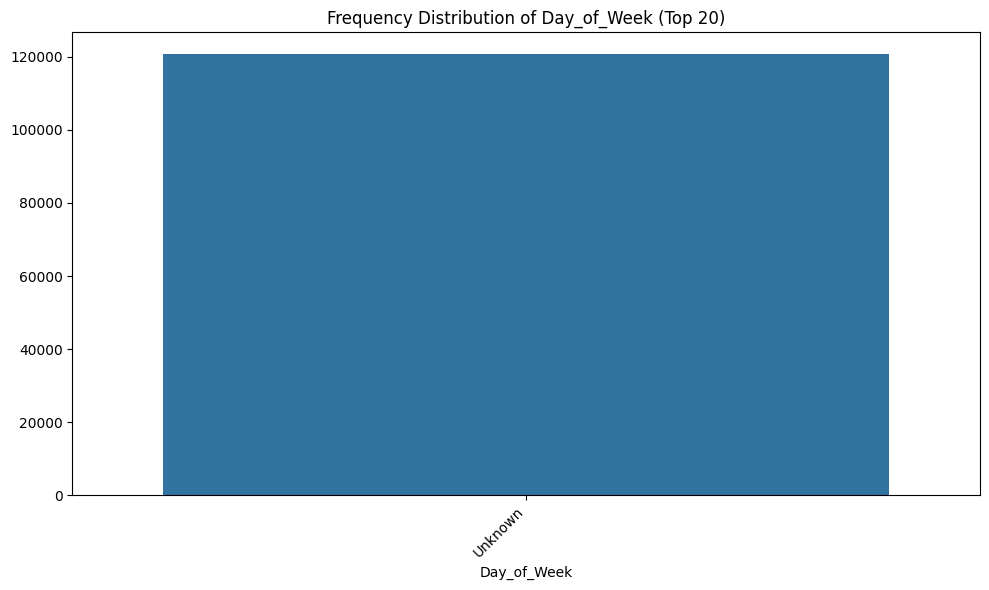

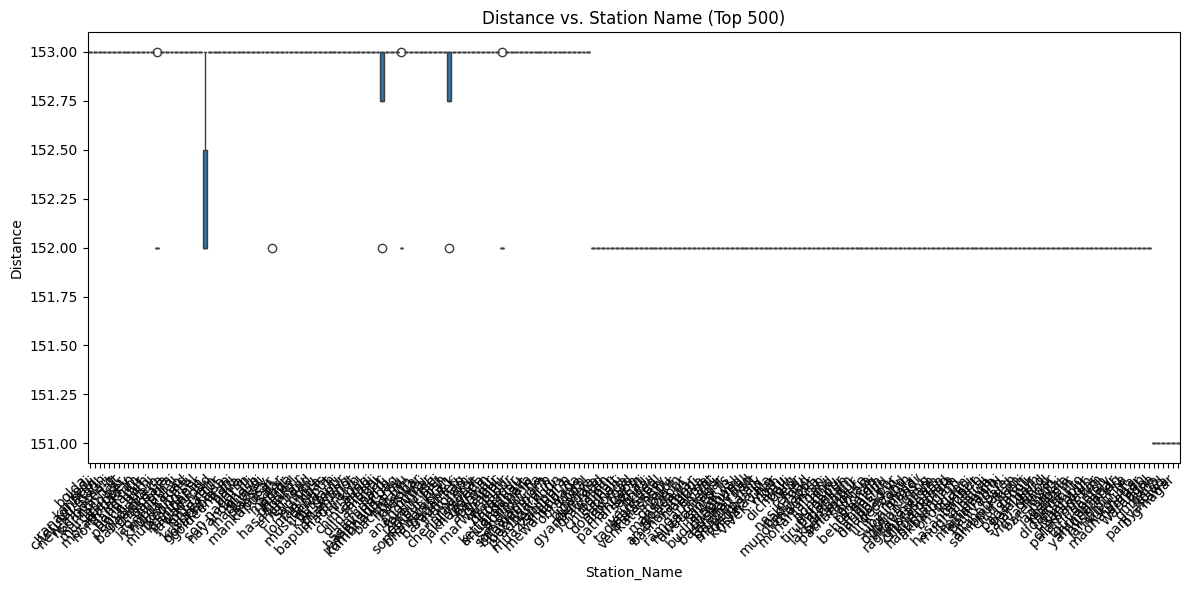

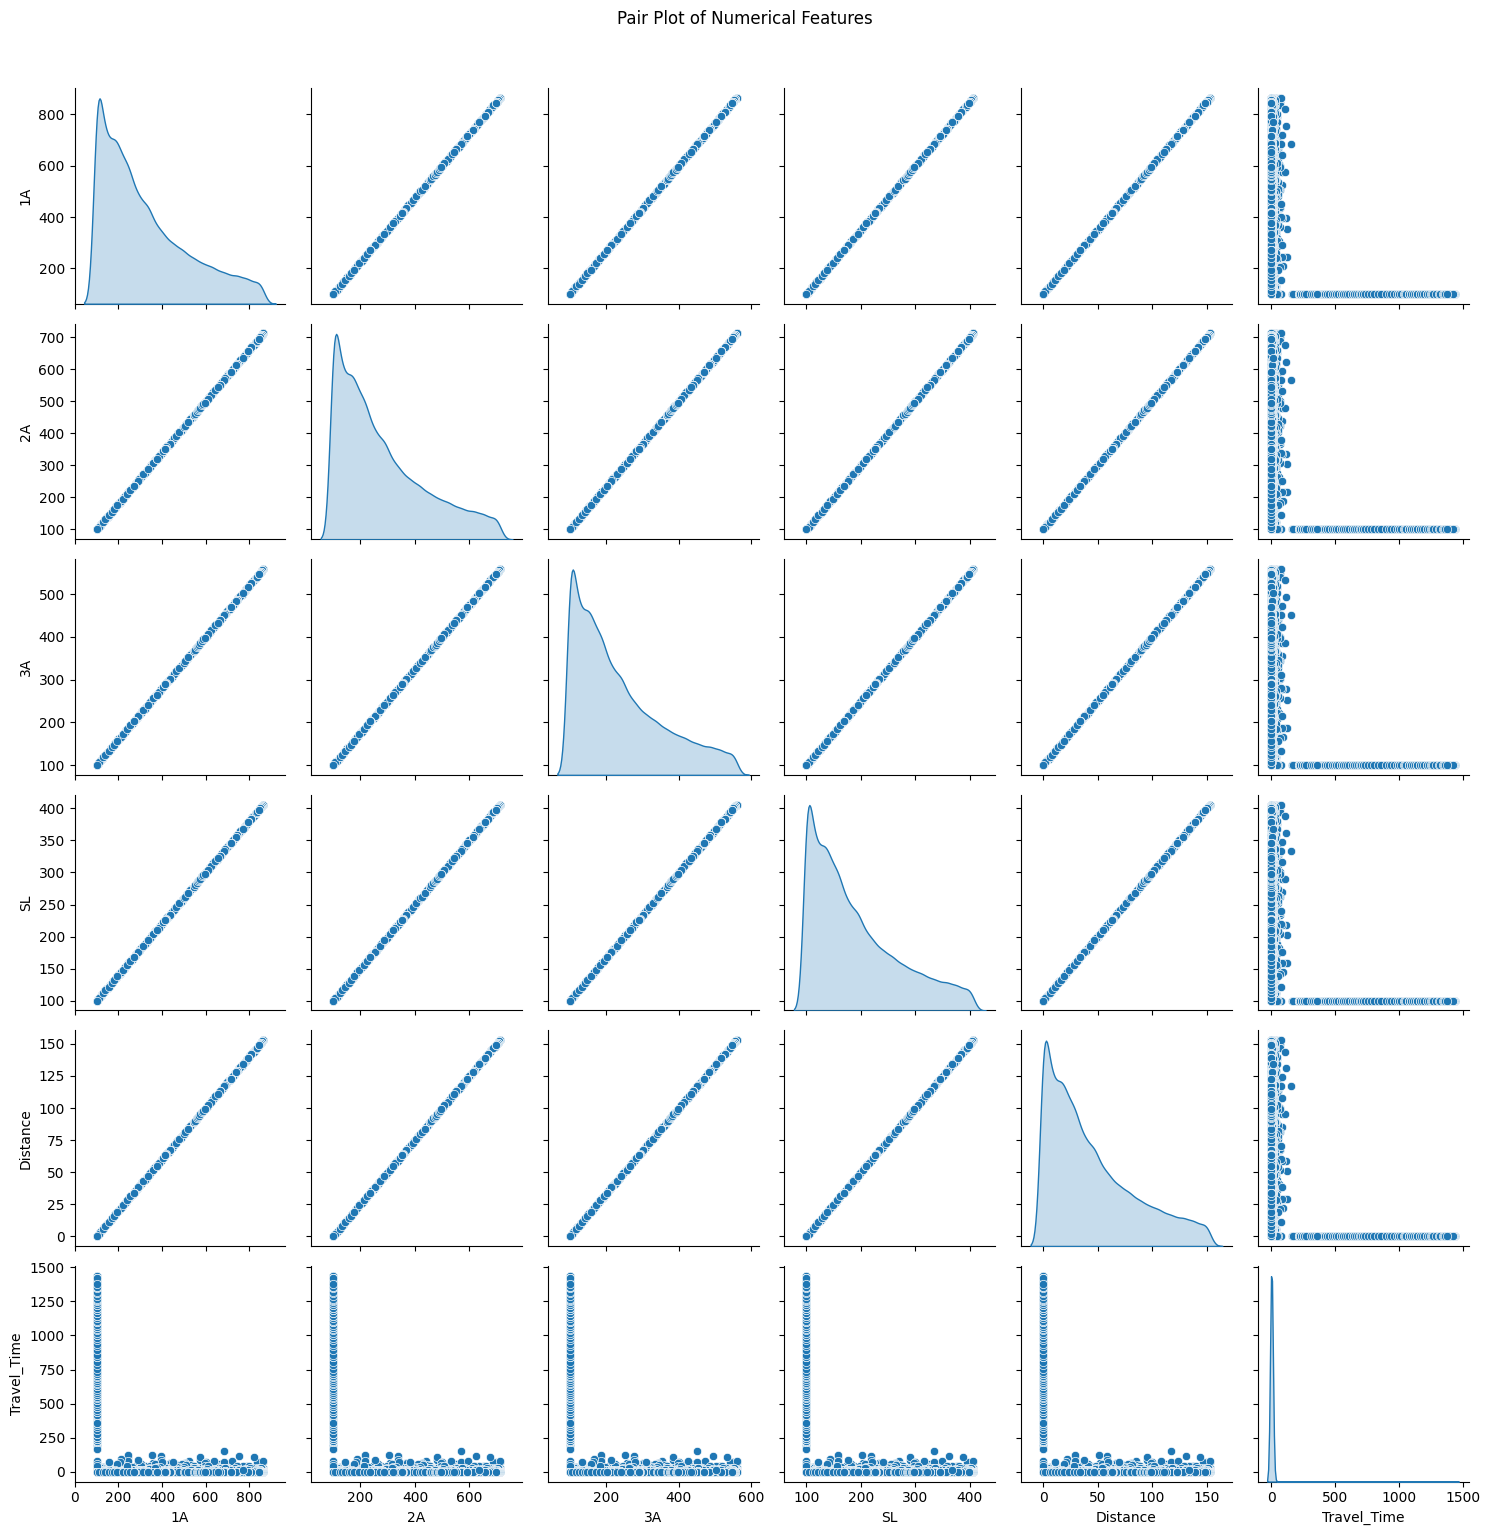

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms and Box Plots
numerical_features = ['1A', '2A', '3A', 'SL', 'Distance', 'Travel_Time']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()


# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()

# Scatter Plots
plt.figure(figsize=(15, 10))
for i, col1 in enumerate(numerical_features):
    for j, col2 in enumerate(numerical_features):
        if i < j:
            plt.subplot(3, 3, i * 3 + j - i * (i + 1) // 2)
            sns.scatterplot(x=df[col1], y=df[col2])
            plt.title(f'{col1} vs {col2}')
plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()

# Categorical Variable Analysis (Bar Plots)
categorical_features = ['Station_Name', 'Station_Code', 'Day_of_Week']
for col in categorical_features:
    top_20 = df[col].value_counts().nlargest(20)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_20.index, y=top_20.values)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Frequency Distribution of {col} (Top 20)')
    plt.tight_layout()
    plt.savefig(f'{col}_barplot.png')
    plt.show()

# Combined Plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Station_Name', y='Distance', data=df.sort_values(by='Distance', ascending=False).head(500))
plt.xticks(rotation=45, ha='right')
plt.title('Distance vs. Station Name (Top 500)')
plt.tight_layout()
plt.savefig('distance_station_boxplot.png')
plt.show()

# Pair Plots
sns.pairplot(df[numerical_features], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.tight_layout()
plt.savefig('pair_plot.png')
plt.show()